# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
# import required libraries 
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load data
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

#### Sales Channel

In [8]:
# gives the glimpse of types and count of sales_channel
df.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [9]:
# gives the glimpse of types and count of trip
df.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [10]:
df = df[df.purchase_lead<600]

In [11]:
df.shape

(49992, 14)

#### Booking complete


In [12]:
# gives the glimpse of booking complete type
df.booking_complete.value_counts()

0    42516
1     7476
Name: booking_complete, dtype: int64

In [13]:
df.booking_complete.value_counts()[1]/len(df)*100

14.954392702832454

Out of 50K data, only 14.95% are positive booking complete

In [14]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

No null value exist

In [15]:
df.duplicated().value_counts()

False    49273
True       719
dtype: int64

##### Remove duplicates

In [16]:
df = df.drop_duplicates()

In [17]:
df.shape

(49273, 14)

In [18]:
df.select_dtypes(include=['object']).columns

Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')

In [19]:
# convert categorical data into numerical data
for col in df.select_dtypes(include=['object']).columns:
    labelencounter = LabelEncoder()
    labelencounter.fit(df[col].unique())
    df[col] = labelencounter.transform(df[col])
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0


In [20]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000,49273.000000
mean,1.590161,0.108822,1.987458,84.629574,23.055365,9.070505,3.813569,392.322164,38.249711,0.668317,0.295679,0.426623,7.279894,0.149960
std,1.016563,0.311419,0.130744,90.111736,33.834276,5.413269,1.991924,227.268544,32.785953,0.470822,0.456352,0.494592,1.496385,0.357036
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,2.000000,21.000000,5.000000,5.000000,2.000000,203.000000,4.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,2.000000,51.000000,17.000000,9.000000,4.000000,382.000000,37.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,2.000000,115.000000,28.000000,13.000000,5.000000,611.000000,58.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,584.000000,778.000000,23.000000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [21]:
df.shape

(49273, 14)

#### input output splitting

In [22]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']
X.shape

(49273, 13)

In [23]:
standerScalar = StandardScaler()
scalar_X = standerScalar.fit_transform(X)

In [24]:
X = pd.DataFrame(scalar_X, columns=df.columns[:-1])

In [25]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,0.403166,-0.349443,0.095932,1.968359,-0.119861,-0.382491,1.097659,-1.726267,0.693911,0.704482,-0.647926,-0.862585,-1.176109
1,-0.580551,-0.349443,0.095932,0.303742,-0.090305,-1.121423,1.097659,-1.726267,0.693911,-1.419482,-0.647926,-0.862585,-1.176109
2,0.403166,-0.349443,0.095932,1.757507,-0.031193,1.464840,-0.408438,-1.726267,-0.068619,0.704482,1.543387,-0.862585,-1.176109
3,-0.580551,-0.349443,0.095932,0.126183,0.234813,-0.936690,1.097659,-1.726267,0.693911,-1.419482,-0.647926,1.159306,-1.176109
4,0.403166,-0.349443,0.095932,-0.184546,-0.031193,1.095374,-0.408438,-1.726267,-0.068619,0.704482,-0.647926,1.159306,-1.176109


#### Correlation Matrix and VIF factor check for Multicollinearity 

<AxesSubplot:>

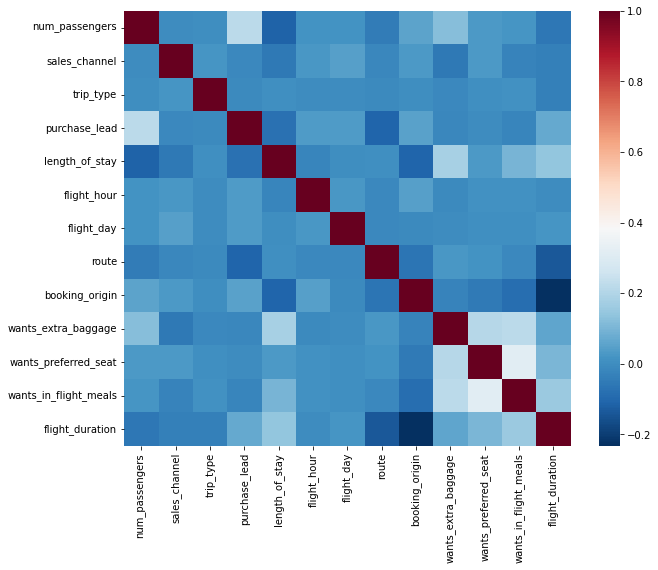

In [26]:
corr = X.corr()
plt.figure(figsize=(10,8))

sb.heatmap(corr,cmap='RdBu_r')

In [27]:
# check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame(data = np.array(pd.DataFrame(X).columns), columns=["attribute"])
vif['VIF'] = -1

for i in range(0, X.shape[1]): #looping through the feature set
    vif.loc[i,'VIF'] = variance_inflation_factor(pd.DataFrame(X).values, i) # calculating VIF factor
    
print(vif)

                attribute       VIF
0          num_passengers  1.091935
1           sales_channel  1.012677
2               trip_type  1.003080
3           purchase_lead  1.075876
4          length_of_stay  1.083962
5             flight_hour  1.004901
6              flight_day  1.004291
7                   route  1.043121
8          booking_origin  1.082210
9     wants_extra_baggage  1.130298
10   wants_preferred_seat  1.144318
11  wants_in_flight_meals  1.166431
12        flight_duration  1.137805


### split train test set

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42,shuffle=True)

### random forest

<AxesSubplot:xlabel='importance', ylabel='feature'>

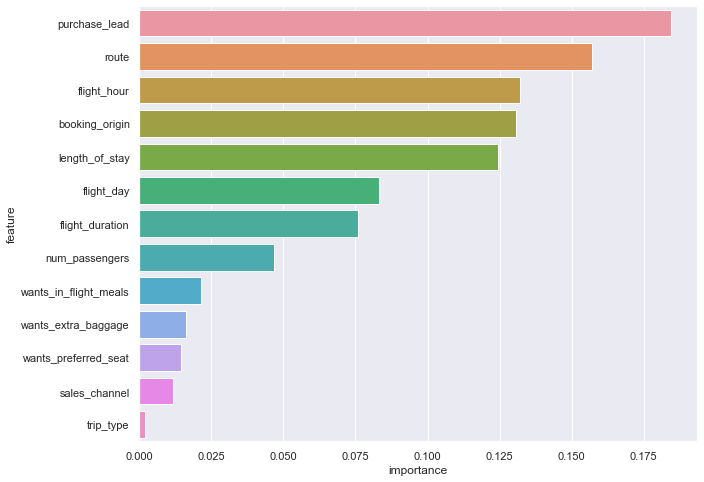

In [29]:
randomforest =RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)
randomforest.fit(X_train,y_train)
features = pd.DataFrame({"feature":X.columns, "importance":randomforest.feature_importances_})
sb.set(rc={'figure.figsize':(10,8)})
sb.barplot(
    x = "importance", 
    y = "feature", 
    data = features,
    order = features.sort_values('importance', ascending = False).feature
)

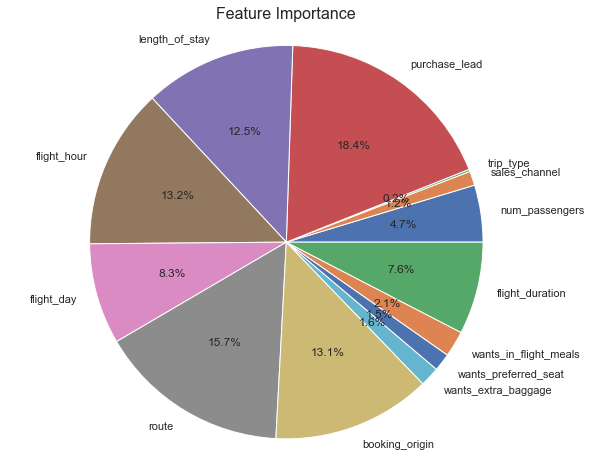

In [30]:
# Get feature importances
importances = randomforest.feature_importances_

# Create a pie chart
plt.pie(importances, labels=X.columns, autopct='%1.1f%%')
plt.title('Feature Importance', fontsize=16)
plt.rcParams['font.size'] = 12
plt.axis('equal')

# Display the pie chart
plt.show()

In [ ]:
#X_train =X_train.drop(columns=["wants_preferred_seat","wants_extra_baggage","sales_channel","trip_type"])
#X_test =X_test.drop(columns=["wants_preferred_seat","wants_extra_baggage","sales_channel","trip_type"])

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score, recall_score, precision_score, r2_score
from sklearn.model_selection import train_test_split

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50,max_depth =50 , min_samples_split=5,random_state=0)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate and print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Accuracy: 0.847691527143582
F2 Score: 0.09092385127455756
Recall: 0.07577807848443843
Precision: 0.4534412955465587
R2 Score: -0.19474266077149527


In [32]:
#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df)

In [33]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [34]:
# add the labels back to the dataframe
scaled_df['booking_complete']  = df['booking_complete']


In [35]:
#create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.booking_complete ==0].sample(n=10000)

In [36]:
#concatenate the two dataframee, one havng all labels 0 and other having all labels as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.booking_complete==1], scaled_df_0], ignore_index=True)

In [37]:
#shuffle the dataframe rows
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [38]:
X = scaled_df_new.iloc[:,:-1]
#X =X.drop(columns=["wants_preferred_seat","wants_extra_baggage","sales_channel","trip_type"])
y = scaled_df_new['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, shuffle=True)

In [39]:
#create an instance of the classifier and fit the training data
clf_rf =  RandomForestClassifier(n_estimators=150,max_depth =50 , min_samples_split=5,random_state=0)


In [40]:
from sklearn.metrics import r2_score,f1_score,accuracy_score,precision_score
clf_rf.fit(X_train,y_train)
y_pred = clf_rf.predict(X_test)
 

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F2 Score:", fbeta_score(y_test, y_pred, beta=2))
print("Recall:", recall_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Accuracy: 0.6010938602681722
F2 Score: 0.4030384271671134
Recall: 0.3797894736842105
Precision: 0.5337278106508876
R2 Score: -0.638607956270878
